# Comparison of High-rated Restaurants in Raleigh and Charlotte

## **Introduction**:
The city of Raleigh, NC and Charlotte, NC have amazing restaurants of different types. These cities are major cities of NC. Comparison between these two cities is being made to see best places to go to in both cities and what type of restaurant are popular in both cities. 


## **Business Problem**:
Analysis is done based on Foursquare likes, restaurant category and geographic location data for restaurants in Charlotte and Raleigh. Then with the help of visualization and cluster analysis will discover category popularity in both cities and their specialities based on Foursquare user feedback.

## **About Data**
The Foursquare API is used to pull the following location data on restaurants in Raleigh, NC and Charlotte, NC:
- Venue Name
- Venue ID
- Venue Location
- Venue Category
- No. of Likes

## **Data Acquisition Approach**

For Data Acquisition, Geolocator latitude and longitude coordinates for Raleigh, NC and Charlotte, NC is used. Then with the help of Foursquare API I extracted list of all venues in Raleigh, NC and Charlotte, NC and filtered for venues of category Restaurant.

**Algorithm Used:**

Used gathered data to create a k-means clustering that groups restaurants into different clusters so that comparison can be made to see which type is popular and which restaurants are the best to eat at in Raleigh and Charlotte. 

## Importing Libraries

In [1]:
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json 
from geopy.geocoders import Nominatim 
import requests 
from pandas.io.json import json_normalize 
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium 
from urllib.request import urlopen
from bs4 import BeautifulSoup
import numpy as np
print('Libraries imported.')

Libraries imported.


**Extracting Geographical coordinate for Charlotte and Raleigh**

In [50]:
address_c = 'Charlotte North Carolina'
address_r = 'Raleigh North Carolina'
geolocator = Nominatim()
location_c = geolocator.geocode(address_c)
location_r = geolocator.geocode(address_r)
latitude_c = location_c.latitude
longitude_c = location_c.longitude
latitude_r = location_r.latitude
longitude_r = location_r.longitude
print('The geograpical coordinate of Charlotte are {}, {}.'.format(latitude_c, longitude_c))
print('The geograpical coordinate of Raleigh are {}, {}.'.format(latitude_r, longitude_r))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


The geograpical coordinate of Charlotte are 35.2270869, -80.8431268.
The geograpical coordinate of Raleigh are 35.7803977, -78.6390989.


**Accessing Foursquare API by my information.**

In [3]:
CLIENT_ID = '4TP5THCRKCPKNM3IRLBQO0PP2GXRJ0IIMZWLBZAMGDZ3Z0AO' 
CLIENT_SECRET = 'OQ4YZ1PVSDJDQKZYLRYYEC2H3AAU5Q3SARJVVGG1B1RI2DVR' 
VERSION = '20180605' 

print('My credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

My credentails:
CLIENT_ID: 4TP5THCRKCPKNM3IRLBQO0PP2GXRJ0IIMZWLBZAMGDZ3Z0AO
CLIENT_SECRET:OQ4YZ1PVSDJDQKZYLRYYEC2H3AAU5Q3SARJVVGG1B1RI2DVR


**Creating a URL for all of the venues in Charlotte and Raleigh**

In [4]:
LIMIT = 1000 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius

# create URL for Charlotte
url_c = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude_c, 
    longitude_c, 
    radius, 
    LIMIT)
url_c

'https://api.foursquare.com/v2/venues/explore?&client_id=4TP5THCRKCPKNM3IRLBQO0PP2GXRJ0IIMZWLBZAMGDZ3Z0AO&client_secret=OQ4YZ1PVSDJDQKZYLRYYEC2H3AAU5Q3SARJVVGG1B1RI2DVR&v=20180605&ll=35.2270869,-80.8431268&radius=1000&limit=1000'

In [5]:
# create URL
url_r = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude_r, 
    longitude_r, 
    radius, 
    LIMIT)
url_r

'https://api.foursquare.com/v2/venues/explore?&client_id=4TP5THCRKCPKNM3IRLBQO0PP2GXRJ0IIMZWLBZAMGDZ3Z0AO&client_secret=OQ4YZ1PVSDJDQKZYLRYYEC2H3AAU5Q3SARJVVGG1B1RI2DVR&v=20180605&ll=35.7803977,-78.6390989&radius=1000&limit=1000'

**Requesting JSON file for the venues URL of Raleigh and Charlotte using beautiful soup library**

In [6]:
results_c = requests.get(url_c).json()
results_c

{'meta': {'code': 200, 'requestId': '5e8348ea78a484001b3c54b5'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Uptown',
  'headerFullLocation': 'Uptown, Charlotte',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 169,
  'suggestedBounds': {'ne': {'lat': 35.236086909000015,
    'lng': -80.83212972615674},
   'sw': {'lat': 35.21808689099999, 'lng': -80.85412387384325}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bad5829f964a52071483be3',
       'name': 'Blumenthal Performing Arts Center',
       'location': {'address': '130 N Tryon St',
        'crossStreet': 'at 5th St',
        'lat': 35.22792953956913,
        'lng':

In [7]:
results_r = requests.get(url_r).json()
results_r

{'meta': {'code': 200, 'requestId': '5e83495347b43d0023d799ce'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Central Raleigh',
  'headerFullLocation': 'Central Raleigh, Raleigh',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 186,
  'suggestedBounds': {'ne': {'lat': 35.78939770900001,
    'lng': -78.62802580164856},
   'sw': {'lat': 35.77139769099999, 'lng': -78.65017199835142}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4ad4c009f964a520eeec20e3',
       'name': 'North Carolina Museum of Natural Sciences',
       'location': {'address': '11 W Jones St',
        'crossStreet': 'at N Salisbury St',
        'lat': 35.

**Extracting data from Foursquare into a dataframe. **

In [8]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

**Pulling the data from the Foursquare API for Raleigh and Charlotte  and filtering the category for each row **

In [9]:

venues_c = results_c['response']['groups'][0]['items']
nearby_venues_c = json_normalize(venues_c)
filtered_columns_c = ['venue.name', 'venue.id', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_c
nearby_venues_char =nearby_venues_c.loc[:, filtered_columns_c]


nearby_venues_char['venue.categories'] = nearby_venues_c.apply(get_category_type, axis=1)



In [51]:
nearby_venues_char.head()

,name,id,categories,lat,lng,total likes,Rating,label
2,The Capital Grille,4b05863ef964a520f45922e3,American Restaurant,35.228216,-80.841974,96,high rated,3
3,Vapiano,4e2ffb921838f1c552ca5f70,Italian Restaurant,35.226234,-80.844124,208,high rated,0
5,Dandelion Market,4b466381f964a5206f1f26e3,Tapas Restaurant,35.228656,-80.842479,236,high rated,0
9,Aria Tuscan Grill,4bb14a46f964a520fa893ce3,Italian Restaurant,35.226615,-80.842317,85,high rated,0
11,Stoke,57a56d1f498e5952a14f86f4,Restaurant,35.228057,-80.843475,33,below avg rated,1


In [11]:

venues_r = results_r['response']['groups'][0]['items']
nearby_venues_r = json_normalize(venues_r)
filtered_columns_r = ['venue.name', 'venue.id', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues_r
nearby_venues_raleigh =nearby_venues_r.loc[:, filtered_columns_r]


nearby_venues_raleigh['venue.categories'] = nearby_venues_r.apply(get_category_type, axis=1)

In [52]:
nearby_venues_raleigh.head()

,name,id,categories,lat,lng,total likes,Rating,label
3,Centro,4ad90386f964a5201d1721e3,Mexican Restaurant,35.779236,-78.638264,125,high rated,0
6,Sitti,4ad93789f964a520261921e3,Mediterranean Restaurant,35.778237,-78.638266,231,high rated,0
8,Gravy,4a592915f964a520d6b81fe3,Italian Restaurant,35.778482,-78.638143,139,high rated,0
10,Death & Taxes,54a1adbe498e54b4407ce331,American Restaurant,35.778245,-78.640375,64,above avg rated,1
15,Trophy Tap & Table,588663ddd60c8b2e0e1b1527,American Restaurant,35.777417,-78.638184,46,below avg rated,2


** Venues term was removed from column names **

In [13]:
nearby_venues_char.columns = [col.split(".")[-1] for col in nearby_venues_char.columns]
nearby_venues_raleigh.columns = [col.split(".")[-1] for col in nearby_venues_raleigh.columns]
nearby_venues_char.head()

,name,id,categories,lat,lng
0,Blumenthal Performing Arts Center,4bad5829f964a52071483be3,Performing Arts Venue,35.227930,-80.841951
1,Belk Theater,4b058640f964a520495a22e3,Concert Hall,35.227711,-80.841663
2,The Capital Grille,4b05863ef964a520f45922e3,American Restaurant,35.228216,-80.841974
3,Vapiano,4e2ffb921838f1c552ca5f70,Italian Restaurant,35.226234,-80.844124
4,The Punch Room,549af5b3498e3a660685323b,Hotel Bar,35.226354,-80.841747


In [14]:
nearby_venues_raleigh.head()

,name,id,categories,lat,lng
0,North Carolina Museum of Natural Sciences,4ad4c009f964a520eeec20e3,Science Museum,35.782217,-78.639375
1,North Carolina Museum of History,4ad4c009f964a520edec20e3,History Museum,35.781516,-78.638747
2,Gallo Pelón,53c2e7a1498e06db62294821,Cocktail Bar,35.779320,-78.638517
3,Centro,4ad90386f964a5201d1721e3,Mexican Restaurant,35.779236,-78.638264
4,Raleigh Raw,56d20a97498e40011a57fbaa,Juice Bar,35.778308,-78.639610


**Finding a list of unique categories from the API **

In [15]:
print(nearby_venues_char['categories'].unique())
print(nearby_venues_raleigh['categories'].unique())

['Performing Arts Venue' 'Concert Hall' 'American Restaurant'
 'Italian Restaurant' 'Hotel Bar' 'Tapas Restaurant' 'Steakhouse'
 'Gym / Fitness Center' 'Burger Joint' 'Shopping Mall' 'Restaurant'
 'Creperie' 'Thai Restaurant' 'Irish Pub' 'Café' 'Pizza Place' 'Theater'
 'Science Museum' 'Burrito Place' 'New American Restaurant'
 'Southern / Soul Food Restaurant' 'Sandwich Place' 'Seafood Restaurant'
 'Souvenir Shop' 'Bakery' 'Gym' 'Park' 'French Restaurant' 'Hotel'
 'Lounge' 'Sports Bar' 'Pub' 'Basketball Stadium' 'Mexican Restaurant'
 'Neighborhood' 'Coffee Shop' 'Food Truck' 'Salon / Barbershop'
 'Fast Food Restaurant' 'BBQ Joint' 'Plaza' 'Farmers Market' 'Pharmacy'
 'Cocktail Bar' 'Bar' 'History Museum' 'Bistro' 'Wine Shop'
 'Deli / Bodega' 'Baseball Stadium' 'Library' 'Art Museum' 'Cheese Shop'
 'Movie Theater' 'Art Gallery' 'Chinese Restaurant']
['Science Museum' 'History Museum' 'Cocktail Bar' 'Mexican Restaurant'
 'Juice Bar' 'Event Space' 'Mediterranean Restaurant' 'Italian Rest

**Filtering out the data having cateogory of Restaurants for Charlotter and Raleigh**

In [16]:

Restaurant_list = ['American Restaurant','Italian Restaurant','Tapas Restaurant','Restaurant','Thai Restaurant','New American Restaurant',
                   'Southern / Soul Food Restaurant','Seafood Restaurant','Mexican Restaurant','Mediterranean Restaurant','Asian Restaurant',
                   'Sushi Restaurant','Fast Food Restaurant','French Restaurant','Chinese Restaurant',
                   'Korean Restaurant','Vegetarian / Vegan Restaurant' ,'Greek Restaurant','Cuban Restaurant','French Restaurant']
                   


nearby_venues_char = nearby_venues_char.copy()
nearby_venues_raleigh = nearby_venues_raleigh.copy()


nearby_venues_char = nearby_venues_char[nearby_venues_char['categories'].isin(Restaurant_list)]

nearby_venues_raleigh = nearby_venues_raleigh[nearby_venues_raleigh['categories'].isin(Restaurant_list)]
nearby_venues_char.shape

(25, 5)

In [17]:
nearby_venues_raleigh.shape

(27, 5)

**Extracting Venue's ID for the restaurant category**

In [18]:
RestaurantId_raleigh = nearby_venues_raleigh['id'].tolist()
print(RestaurantId_raleigh)

['4ad90386f964a5201d1721e3', '4ad93789f964a520261921e3', '4a592915f964a520d6b81fe3', '54a1adbe498e54b4407ce331', '588663ddd60c8b2e0e1b1527', '4e091acc1f6e21103396e069', '4ee404309911944900b07ad5', '51940a5d498e9111bc706456', '590a66230f013c70e0a0c5f1', '4ad90968f964a520651721e3', '57f2d3e8498e33363fc556f5', '5577a05f498e75efda31c6a9', '57a7bf38498ea30d9431bde1', '4ad9fa9af964a520ab1c21e3', '58581f96076be1032aaa07f4', '4aeb2a4cf964a52033bf21e3', '516798e0e4b0cda68217b5ed', '4b5a7661f964a520a2c628e3', '5916326a396de017a362ff17', '4ae6edcaf964a5208ea721e3', '57a3dd62498ee795c42ef2de', '52251fd611d21c8d037f3127', '527e482c498e9cdc1c97aefc', '50a5647be4b079eb079361fa', '51eeca15498e3ffb88aaa1fe', '584220e9158bbb7cc1cc3b70', '4b574f3ff964a520923028e3']


In [19]:
RestaurantId_char = nearby_venues_char['id'].tolist()
print(RestaurantId_char)

['4b05863ef964a520f45922e3', '4e2ffb921838f1c552ca5f70', '4b466381f964a5206f1f26e3', '4bb14a46f964a520fa893ce3', '57a56d1f498e5952a14f86f4', '4b09c3fef964a520311d23e3', '4f516ba8e4b063296bf04765', '57a85cb7498ebb2205737e6d', '4f8b5454e4b00a6263a38774', '4bd07af1caff952185dfcef0', '5ae7e6746bdee6002c84ed22', '55a42c96498e793e0e13b18c', '5b639c99cabcff002cbe11b1', '4b05863ff964a520345a22e3', '4c23a655f3859c7420c56488', '4b227205f964a520df4624e3', '4c35f417a0ced13aac921a6e', '54ecae87498ec256aee9450d', '584365c79850a03d8398144e', '54b44378498ef448d8d66a89', '55dbe199498ef4a77a86e19a', '4b05863bf964a520775922e3', '4dffdc28b0fb2c93493a20bc', '5abe6deb2c7eb93d804a687f', '4b0d86eff964a5203e4a23e3']


**Creating empty list to extract likes from the API corresponding to Venue ID**

In [20]:
#set up to pull the likes from the API based on venue ID

url_list = []
url_list2 = []
like_Charlist = []
like_Raleighlist=[]
json_list = []

In [21]:
for i in RestaurantId_char:
    venue_url = 'https://api.foursquare.com/v2/venues/{}/likes?client_id={}&client_secret={}&v={}'.format(i, CLIENT_ID, CLIENT_SECRET, VERSION)
    url_list.append(venue_url)
for link in url_list:
    resultChar = requests.get(link).json()
    likesChar = resultChar['response']['likes']['count']
    like_Charlist.append(likesChar)
print(like_Charlist)

[96, 208, 236, 85, 33, 112, 90, 37, 212, 98, 9, 44, 18, 168, 137, 19, 17, 121, 15, 7, 35, 101, 41, 16, 32]


In [22]:
for i in RestaurantId_raleigh:
    venue_url = 'https://api.foursquare.com/v2/venues/{}/likes?client_id={}&client_secret={}&v={}'.format(i, CLIENT_ID, CLIENT_SECRET, VERSION)
    url_list2.append(venue_url)
for link in url_list2:
    resultRaleigh = requests.get(link).json()
    likesRaleigh = resultRaleigh['response']['likes']['count']
    like_Raleighlist.append(likesRaleigh)
print(like_Raleighlist)

[125, 231, 139, 64, 46, 453, 262, 64, 16, 146, 23, 93, 89, 55, 30, 54, 126, 50, 22, 202, 40, 149, 39, 123, 102, 14, 53]


**Creating new variable in the dataframe containing total no. of likes for each restaurant**

In [23]:
# add in the list of likes
nearby_venues_raleigh['total likes'] = like_Raleighlist
nearby_venues_char['total likes'] = like_Charlist
nearby_venues_char.head()

,name,id,categories,lat,lng,total likes
2,The Capital Grille,4b05863ef964a520f45922e3,American Restaurant,35.228216,-80.841974,96
3,Vapiano,4e2ffb921838f1c552ca5f70,Italian Restaurant,35.226234,-80.844124,208
5,Dandelion Market,4b466381f964a5206f1f26e3,Tapas Restaurant,35.228656,-80.842479,236
9,Aria Tuscan Grill,4bb14a46f964a520fa893ce3,Italian Restaurant,35.226615,-80.842317,85
11,Stoke,57a56d1f498e5952a14f86f4,Restaurant,35.228057,-80.843475,33


In [24]:
nearby_venues_raleigh.head()

,name,id,categories,lat,lng,total likes
3,Centro,4ad90386f964a5201d1721e3,Mexican Restaurant,35.779236,-78.638264,125
6,Sitti,4ad93789f964a520261921e3,Mediterranean Restaurant,35.778237,-78.638266,231
8,Gravy,4a592915f964a520d6b81fe3,Italian Restaurant,35.778482,-78.638143,139
10,Death & Taxes,54a1adbe498e54b4407ce331,American Restaurant,35.778245,-78.640375,64
15,Trophy Tap & Table,588663ddd60c8b2e0e1b1527,American Restaurant,35.777417,-78.638184,46


**Descriptive Analysis of obtained dataframe for further analysis of restaurants in Raleigh and Charlotte**

For Raleigh

In [25]:
nearby_venues_raleigh.describe()

,lat,lng,total likes
count,27.000000,27.000000,27.000000
mean,35.777776,-78.639461,104.074074
std,0.002151,0.003450,95.887725
min,35.774581,-78.646165,14.000000
25%,35.776105,-78.642841,43.000000
50%,35.777227,-78.638264,64.000000
75%,35.778859,-78.636781,132.500000
max,35.782864,-78.634479,453.000000


For Charlotte

In [26]:
nearby_venues_char.describe()

,lat,lng,total likes
count,25.000000,25.000000,25.00000
mean,35.227405,-80.842793,79.48000
std,0.001253,0.001957,69.04414
min,35.224981,-80.847295,7.00000
25%,35.226428,-80.843548,19.00000
50%,35.227504,-80.842806,44.00000
75%,35.228216,-80.841523,112.00000
max,35.229240,-80.839710,236.00000


**Visualizing the distribution of total likes**

Charlotte Dataframe

In [27]:


import matplotlib.pyplot as plt
nearby_venues_char['total likes'].hist(bins=4)
plt.show()

<Figure size 640x480 with 1 Axes>

Raleigh Dataframe

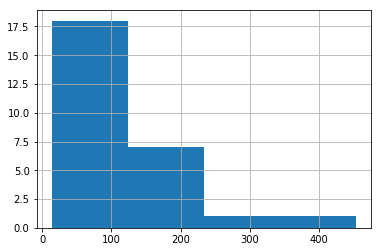

In [28]:
nearby_venues_raleigh['total likes'].hist(bins=4)
plt.show()

Based on no. of counts for each type of category, bar plot is drawn to see which type of restaurants are more common in both cities based on the data we obtained.

Below is the Bar plot for Raleigh. We can see that Italian type of Restaurant is found to be most common in Raleigh

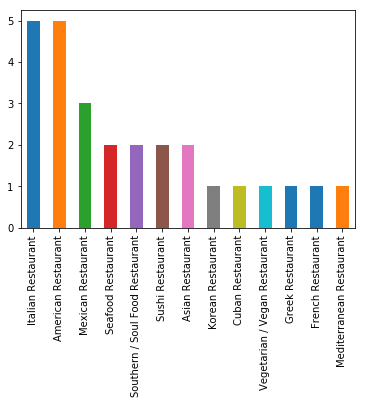

In [29]:
nearby_venues_raleigh['categories'].value_counts().plot('bar')

Below is bar plot based on Charlotte data, we found American type and general restaurant with no particular category  are common in Charlotte

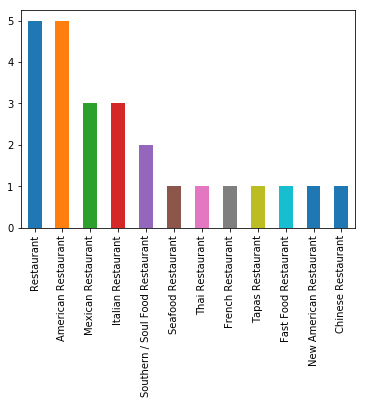

In [30]:
nearby_venues_char['categories'].value_counts().plot('bar')

**Making 4 categories to categorize Raleigh and Charlotte data based on no. of Likes Restaurants received. Here, High rated, above avg rated, below average rated and poor rated category are used for the no. of likes falling in the range of 80<, 50-80,25-50, 25>.**
 

In [31]:
# let's set up a function that will re-categorize our restaurants based on likes

def conditions(s):
    if s['total likes']<=25:
        return 'poor rated'
    if s['total likes']<=50:
        return 'below avg rated'
    if s['total likes']<=80:
        return 'above avg rated'
    if s['total likes']>80:
        return 'high rated'

nearby_venues_char['Rating']=nearby_venues_char.apply(conditions, axis=1)
nearby_venues_char.head()

,name,id,categories,lat,lng,total likes,Rating
2,The Capital Grille,4b05863ef964a520f45922e3,American Restaurant,35.228216,-80.841974,96,high rated
3,Vapiano,4e2ffb921838f1c552ca5f70,Italian Restaurant,35.226234,-80.844124,208,high rated
5,Dandelion Market,4b466381f964a5206f1f26e3,Tapas Restaurant,35.228656,-80.842479,236,high rated
9,Aria Tuscan Grill,4bb14a46f964a520fa893ce3,Italian Restaurant,35.226615,-80.842317,85,high rated
11,Stoke,57a56d1f498e5952a14f86f4,Restaurant,35.228057,-80.843475,33,below avg rated


In [32]:
nearby_venues_raleigh['Rating']=nearby_venues_raleigh.apply(conditions, axis=1)
nearby_venues_raleigh.head()

,name,id,categories,lat,lng,total likes,Rating
3,Centro,4ad90386f964a5201d1721e3,Mexican Restaurant,35.779236,-78.638264,125,high rated
6,Sitti,4ad93789f964a520261921e3,Mediterranean Restaurant,35.778237,-78.638266,231,high rated
8,Gravy,4a592915f964a520d6b81fe3,Italian Restaurant,35.778482,-78.638143,139,high rated
10,Death & Taxes,54a1adbe498e54b4407ce331,American Restaurant,35.778245,-78.640375,64,above avg rated
15,Trophy Tap & Table,588663ddd60c8b2e0e1b1527,American Restaurant,35.777417,-78.638184,46,below avg rated


Below visualization represents that there are more differences in high rated restaurants and restaurant with other 3 rated group in Raleigh as compared to Charlotte. Most of the restaurants received high rating in both the cities.

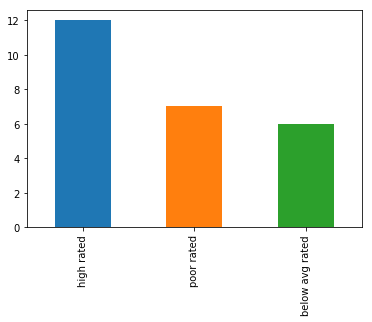

In [33]:
nearby_venues_char['Rating'].value_counts().plot('bar')

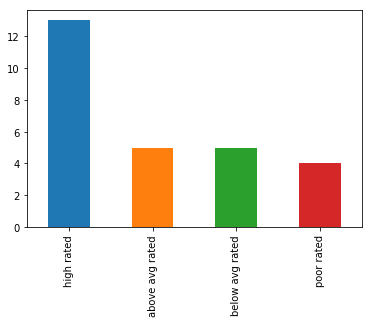

In [34]:
nearby_venues_raleigh['Rating'].value_counts().plot('bar')

Creating dummy variables for the no. of likes and the restaurant categories in Raleigh.

In [35]:
# one hot encoding
Raleigh_onehot = pd.get_dummies(nearby_venues_raleigh[['categories', 'Rating']], prefix="", prefix_sep="")

# adding neighborhood column back to dataframe
Raleigh_onehot['Name'] = nearby_venues_raleigh['name'] 

# moving neighborhood column to the first column
fixed_columns1 = [Raleigh_onehot.columns[-1]] + list(Raleigh_onehot.columns[:-1])
Raleigh_onehot = Raleigh_onehot[fixed_columns1]

Raleigh_onehot.head()

,Name,American Restaurant,Asian Restaurant,Cuban Restaurant,French Restaurant,Greek Restaurant,Italian Restaurant,Korean Restaurant,Mediterranean Restaurant,Mexican Restaurant,Seafood Restaurant,Southern / Soul Food Restaurant,Sushi Restaurant,Vegetarian / Vegan Restaurant,above avg rated,below avg rated,high rated,poor rated
3,Centro,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
6,Sitti,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
8,Gravy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
10,Death & Taxes,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
15,Trophy Tap & Table,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


Creating dummy variables for the no. of likes and the restaurant categories in Charlotte.

In [36]:
# one hot encoding
Char_onehot = pd.get_dummies(nearby_venues_char[['categories', 'Rating']], prefix="", prefix_sep="")

# adding neighborhood column back to dataframe
Char_onehot['Name'] = nearby_venues_char['name'] 

# moving neighborhood column to the first column
fixed_columns2 = [Char_onehot.columns[-1]] + list(Char_onehot.columns[:-1])
Char_onehot = Char_onehot[fixed_columns2]

Char_onehot

,Name,American Restaurant,Chinese Restaurant,Fast Food Restaurant,French Restaurant,Italian Restaurant,Mexican Restaurant,New American Restaurant,Restaurant,Seafood Restaurant,Southern / Soul Food Restaurant,Tapas Restaurant,Thai Restaurant,below avg rated,high rated,poor rated
2,The Capital Grille,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,Vapiano,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
5,Dandelion Market,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
9,Aria Tuscan Grill,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
11,Stoke,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
13,Basil Thai Cuisine,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
22,Rooster's Wood Fired Kitchen II,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
23,Coco and the Director,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
24,5 Church,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
25,The King's Kitchen,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


Performing **K-means clustering** to classify both data

In [37]:
cluster_char = Char_onehot.drop('Name', axis=1)

k_clusters = 4


kmeansC = KMeans(n_clusters=k_clusters, random_state=0).fit(cluster_char)


kmeansC.labels_

array([3, 0, 0, 0, 1, 0, 3, 1, 0, 0, 2, 1, 2, 0, 0, 2, 2, 0, 2, 2, 1, 3,
       1, 2, 1], dtype=int32)

In [38]:
nearby_venues_char['label'] = kmeansC.labels_
nearby_venues_char

,name,id,categories,lat,lng,total likes,Rating,label
2,The Capital Grille,4b05863ef964a520f45922e3,American Restaurant,35.228216,-80.841974,96,high rated,3
3,Vapiano,4e2ffb921838f1c552ca5f70,Italian Restaurant,35.226234,-80.844124,208,high rated,0
5,Dandelion Market,4b466381f964a5206f1f26e3,Tapas Restaurant,35.228656,-80.842479,236,high rated,0
9,Aria Tuscan Grill,4bb14a46f964a520fa893ce3,Italian Restaurant,35.226615,-80.842317,85,high rated,0
11,Stoke,57a56d1f498e5952a14f86f4,Restaurant,35.228057,-80.843475,33,below avg rated,1
13,Basil Thai Cuisine,4b09c3fef964a520311d23e3,Thai Restaurant,35.228941,-80.842806,112,high rated,0
22,Rooster's Wood Fired Kitchen II,4f516ba8e4b063296bf04765,American Restaurant,35.226856,-80.841229,90,high rated,3
23,Coco and the Director,57a85cb7498ebb2205737e6d,Restaurant,35.227684,-80.843548,37,below avg rated,1
24,5 Church,4f8b5454e4b00a6263a38774,New American Restaurant,35.228548,-80.843054,212,high rated,0
25,The King's Kitchen,4bd07af1caff952185dfcef0,Southern / Soul Food Restaurant,35.228093,-80.844206,98,high rated,0


## **Seeing clusters on Map using folium library**

In [39]:
map_clusters1 = folium.Map(location=[latitude_c, longitude_c], zoom_start=11)

# set color scheme for the clusters
x = np.arange(k_clusters)
ys = [i+x+(i*x)**2 for i in range(k_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(nearby_venues_char['lat'], nearby_venues_char['lng'], nearby_venues_char['name'], nearby_venues_char['label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters1)
       
map_clusters1
# Map for Charlotte city

Cluster 0 and 3 represents High rated Restaurants in Charlotte

In [40]:
nearby_venues_char.loc[ (nearby_venues_char['label']==0)|  (nearby_venues_char['label']==3) ]

,name,id,categories,lat,lng,total likes,Rating,label
2,The Capital Grille,4b05863ef964a520f45922e3,American Restaurant,35.228216,-80.841974,96,high rated,3
3,Vapiano,4e2ffb921838f1c552ca5f70,Italian Restaurant,35.226234,-80.844124,208,high rated,0
5,Dandelion Market,4b466381f964a5206f1f26e3,Tapas Restaurant,35.228656,-80.842479,236,high rated,0
9,Aria Tuscan Grill,4bb14a46f964a520fa893ce3,Italian Restaurant,35.226615,-80.842317,85,high rated,0
13,Basil Thai Cuisine,4b09c3fef964a520311d23e3,Thai Restaurant,35.228941,-80.842806,112,high rated,0
22,Rooster's Wood Fired Kitchen II,4f516ba8e4b063296bf04765,American Restaurant,35.226856,-80.841229,90,high rated,3
24,5 Church,4f8b5454e4b00a6263a38774,New American Restaurant,35.228548,-80.843054,212,high rated,0
25,The King's Kitchen,4bd07af1caff952185dfcef0,Southern / Soul Food Restaurant,35.228093,-80.844206,98,high rated,0
39,Mert’s Heart & Soul Restaurant,4b05863ff964a520345a22e3,Southern / Soul Food Restaurant,35.227318,-80.840130,168,high rated,0
44,Vida Cantina,4c23a655f3859c7420c56488,Mexican Restaurant,35.226011,-80.841920,137,high rated,0


Cluster 2 represents Poor-rated restaurants in Charlotte 

In [41]:
nearby_venues_char.loc[nearby_venues_char['label']==2]

,name,id,categories,lat,lng,total likes,Rating,label
28,Eddie V's Prime Seafood,5ae7e6746bdee6002c84ed22,Seafood Restaurant,35.226875,-80.843260,9,poor rated,2
36,La Belle Helene,5b639c99cabcff002cbe11b1,French Restaurant,35.225283,-80.845659,18,poor rated,2
50,Luce Restaurant & Bar,4b227205f964a520df4624e3,Italian Restaurant,35.227982,-80.841263,19,poor rated,2
52,Chick-fil-A,4c35f417a0ced13aac921a6e,Fast Food Restaurant,35.226428,-80.843287,17,poor rated,2
65,Que Onda Tacos + Tequila,584365c79850a03d8398144e,Mexican Restaurant,35.229213,-80.845517,15,poor rated,2
68,Chicken Salad Chick,54b44378498ef448d8d66a89,Restaurant,35.226263,-80.842948,7,poor rated,2
88,Haymaker,5abe6deb2c7eb93d804a687f,American Restaurant,35.227350,-80.847295,16,poor rated,2


Cluster 1 represents below average rated restaurants in Charlotte

In [42]:
nearby_venues_char.loc[nearby_venues_char['label']==1]

,name,id,categories,lat,lng,total likes,Rating,label
11,Stoke,57a56d1f498e5952a14f86f4,Restaurant,35.228057,-80.843475,33,below avg rated,1
23,Coco and the Director,57a85cb7498ebb2205737e6d,Restaurant,35.227684,-80.843548,37,below avg rated,1
35,The Cellar,55a42c96498e793e0e13b18c,Restaurant,35.229240,-80.839710,44,below avg rated,1
72,204 North Kitchen & Cocktails,55dbe199498ef4a77a86e19a,American Restaurant,35.227895,-80.841523,35,below avg rated,1
78,Moe's Southwest Grill,4dffdc28b0fb2c93493a20bc,Mexican Restaurant,35.225655,-80.842048,41,below avg rated,1
95,Soho Bistro,4b0d86eff964a5203e4a23e3,Chinese Restaurant,35.227504,-80.840373,32,below avg rated,1


In [43]:
cluster_Raleigh = Raleigh_onehot.drop('Name', axis=1)

k_clusters = 4


kmeansR = KMeans(n_clusters=k_clusters, random_state=0).fit(cluster_Raleigh)


kmeansR.labels_

array([0, 0, 0, 1, 2, 0, 0, 1, 3, 0, 3, 0, 0, 1, 2, 1, 0, 2, 3, 0, 2, 0,
       2, 0, 0, 3, 1], dtype=int32)

In [44]:
nearby_venues_raleigh['label'] = kmeansR.labels_
nearby_venues_raleigh

,name,id,categories,lat,lng,total likes,Rating,label
3,Centro,4ad90386f964a5201d1721e3,Mexican Restaurant,35.779236,-78.638264,125,high rated,0
6,Sitti,4ad93789f964a520261921e3,Mediterranean Restaurant,35.778237,-78.638266,231,high rated,0
8,Gravy,4a592915f964a520d6b81fe3,Italian Restaurant,35.778482,-78.638143,139,high rated,0
10,Death & Taxes,54a1adbe498e54b4407ce331,American Restaurant,35.778245,-78.640375,64,above avg rated,1
15,Trophy Tap & Table,588663ddd60c8b2e0e1b1527,American Restaurant,35.777417,-78.638184,46,below avg rated,2
16,Beasley's Chicken + Honey,4e091acc1f6e21103396e069,Southern / Soul Food Restaurant,35.776968,-78.638175,453,high rated,0
17,Bida Manda Laotian Restaurant and Bar,4ee404309911944900b07ad5,Asian Restaurant,35.777227,-78.636812,262,high rated,0
24,Garland,51940a5d498e9111bc706456,Asian Restaurant,35.776947,-78.639887,64,above avg rated,1
26,St. Roch Fine Oysters + Bar,590a66230f013c70e0a0c5f1,Seafood Restaurant,35.777494,-78.638153,16,poor rated,3
30,Sono,4ad90968f964a520651721e3,Sushi Restaurant,35.775919,-78.638562,146,high rated,0


In [45]:
map_clusters2 = folium.Map(location=[latitude_r, longitude_r], zoom_start=11)

# set color scheme for the clusters
x = np.arange(k_clusters)
ys = [i+x+(i*x)**2 for i in range(k_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(nearby_venues_raleigh['lat'], nearby_venues_raleigh['lng'], nearby_venues_raleigh['name'], nearby_venues_raleigh['label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters2)
       
map_clusters2
#Map for Raleigh

Cluster 0 represents high rated restaurants in Raleigh

In [46]:
nearby_venues_raleigh.loc[ nearby_venues_raleigh['label']==0 ]

,name,id,categories,lat,lng,total likes,Rating,label
3,Centro,4ad90386f964a5201d1721e3,Mexican Restaurant,35.779236,-78.638264,125,high rated,0
6,Sitti,4ad93789f964a520261921e3,Mediterranean Restaurant,35.778237,-78.638266,231,high rated,0
8,Gravy,4a592915f964a520d6b81fe3,Italian Restaurant,35.778482,-78.638143,139,high rated,0
16,Beasley's Chicken + Honey,4e091acc1f6e21103396e069,Southern / Soul Food Restaurant,35.776968,-78.638175,453,high rated,0
17,Bida Manda Laotian Restaurant and Bar,4ee404309911944900b07ad5,Asian Restaurant,35.777227,-78.636812,262,high rated,0
30,Sono,4ad90968f964a520651721e3,Sushi Restaurant,35.775919,-78.638562,146,high rated,0
32,Taverna Agora,5577a05f498e75efda31c6a9,Greek Restaurant,35.780776,-78.644406,93,high rated,0
40,Whiskey Kitchen,57a7bf38498ea30d9431bde1,Southern / Soul Food Restaurant,35.776861,-78.642111,89,high rated,0
53,Oak City Meatball Shoppe,516798e0e4b0cda68217b5ed,Italian Restaurant,35.775520,-78.637234,126,high rated,0
63,42nd St Oyster Bar,4ae6edcaf964a5208ea721e3,Seafood Restaurant,35.782864,-78.646165,202,high rated,0


Cluster 1 represents above average rated restaurants in Raleigh

In [47]:
nearby_venues_raleigh.loc[ nearby_venues_raleigh['label']==1 ]

,name,id,categories,lat,lng,total likes,Rating,label
10,Death & Taxes,54a1adbe498e54b4407ce331,American Restaurant,35.778245,-78.640375,64,above avg rated,1
24,Garland,51940a5d498e9111bc706456,Asian Restaurant,35.776947,-78.639887,64,above avg rated,1
44,Caffé Luna,4ad9fa9af964a520ab1c21e3,Italian Restaurant,35.778086,-78.636749,55,above avg rated,1
51,Second Empire Restaurant & Tavern,4aeb2a4cf964a52033bf21e3,American Restaurant,35.781020,-78.644680,54,above avg rated,1
97,Vic's Ristorante Italiano & Pizzeria,4b574f3ff964a520923028e3,Italian Restaurant,35.775933,-78.635778,53,above avg rated,1


Cluster 2 represents below average rated restaurants in Raleigh

In [48]:
nearby_venues_raleigh.loc[ nearby_venues_raleigh['label']==2 ]

,name,id,categories,lat,lng,total likes,Rating,label
15,Trophy Tap & Table,588663ddd60c8b2e0e1b1527,American Restaurant,35.777417,-78.638184,46,below avg rated,2
46,City Market Sushi,58581f96076be1032aaa07f4,Sushi Restaurant,35.776276,-78.635776,30,below avg rated,2
54,Oakwood Cafe,4b5a7661f964a520a2c628e3,Cuban Restaurant,35.780861,-78.634560,50,below avg rated,2
67,Parkside,57a3dd62498ee795c42ef2de,American Restaurant,35.776854,-78.643795,40,below avg rated,2
82,Gringo A Go Go,527e482c498e9cdc1c97aefc,Mexican Restaurant,35.781287,-78.634479,39,below avg rated,2


Cluster 3 represents poor rated restaurants in Raleigh

In [49]:
nearby_venues_raleigh.loc[ nearby_venues_raleigh['label']==3 ]

,name,id,categories,lat,lng,total likes,Rating,label
26,St. Roch Fine Oysters + Bar,590a66230f013c70e0a0c5f1,Seafood Restaurant,35.777494,-78.638153,16,poor rated,3
31,The District,57f2d3e8498e33363fc556f5,American Restaurant,35.779788,-78.643572,23,poor rated,3
55,Mofu Shoppe,5916326a396de017a362ff17,Korean Restaurant,35.775916,-78.636603,22,poor rated,3
96,Royale,584220e9158bbb7cc1cc3b70,French Restaurant,35.776768,-78.636545,14,poor rated,3
